<a href="https://colab.research.google.com/github/DotBion/NYU-DS-Bootcamp/blob/main/ass_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8 Assignment - Logistic Regression and Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Part 1: Logistic Regression

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

### Evaluate model at different thresholds

In [3]:
thresholds = [0.2, 0.5, 0.7, 0.9]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"Threshold: {thresh}")
    print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print()

Threshold: 0.2
Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0

Threshold: 0.5
Accuracy: 0.9824561403508771
Precision: 0.9906542056074766
Recall: 0.9814814814814815

Threshold: 0.7
Accuracy: 0.9649122807017544
Precision: 0.9903846153846154
Recall: 0.9537037037037037

Threshold: 0.9
Accuracy: 0.9298245614035088
Precision: 0.9897959183673469
Recall: 0.8981481481481481



### ROC Curve

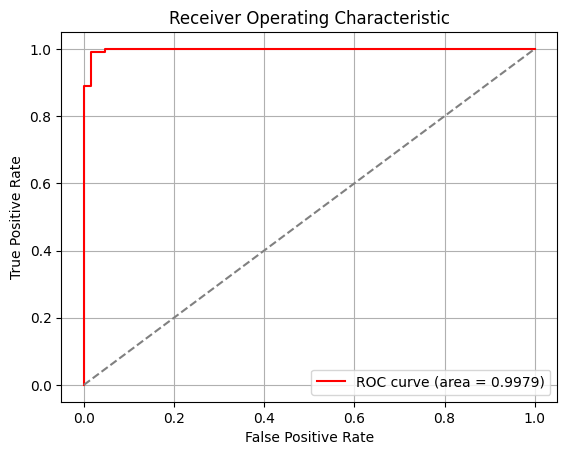

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Part 2: Clustering Analysis

In [7]:
from sklearn.datasets import make_blobs
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
X_blobs_df = pd.DataFrame(X_blobs, columns=['Feature1', 'Feature2'])

### KMeans for different values of k

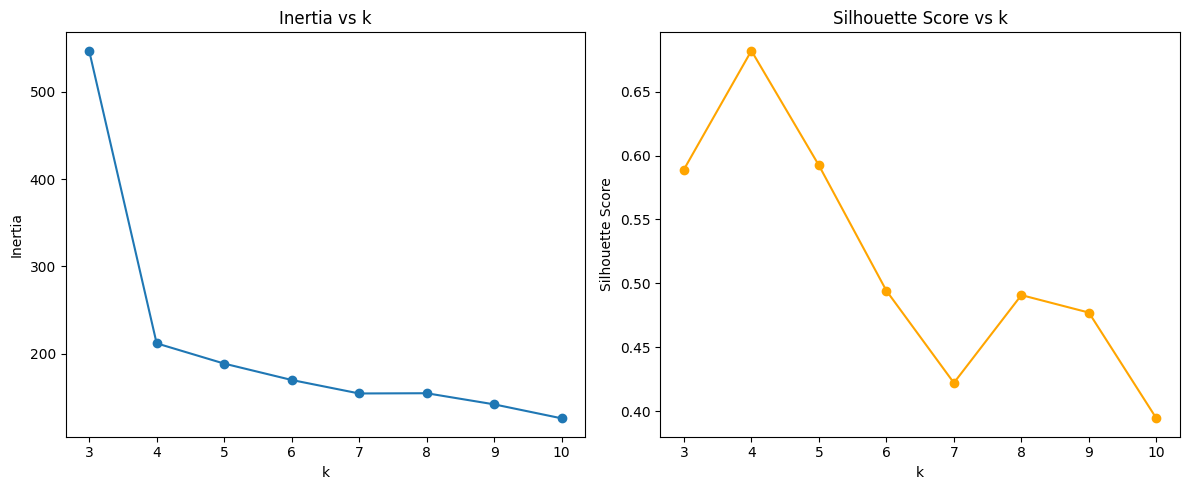

In [8]:
inertias = []
silhouette_scores = []
k_values = range(3, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_blobs_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_blobs_df, kmeans.labels_))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title("Inertia vs k")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

### What if you don't scale the features?

In [9]:
X_scaled = StandardScaler().fit_transform(X_blobs_df)

kmeans_unscaled = KMeans(n_clusters=4).fit(X_blobs_df)
kmeans_scaled = KMeans(n_clusters=4).fit(X_scaled)

print("Inertia (unscaled):", kmeans_unscaled.inertia_)
print("Inertia (scaled):", kmeans_scaled.inertia_)
print("Silhouette (unscaled):", silhouette_score(X_blobs_df, kmeans_unscaled.labels_))
print("Silhouette (scaled):", silhouette_score(X_scaled, kmeans_scaled.labels_))

Inertia (unscaled): 212.00599621083475
Inertia (scaled): 56.024770575099495
Silhouette (unscaled): 0.6819938690643478
Silhouette (scaled): 0.6569234398199433


### Is there a right k?

There is no single 'right' k. It depends on the context and structure of your data.
Using metrics like inertia, silhouette score, and the elbow method help to make an informed decision.